Monte-carlo simulation
===

In [5]:
import numpy as np
import matplotlib.pyplot as plt

the formula to simulate stock prices is


> S_t = S_0 * e^{[r - 0.5 * sigma^2]t + sigma * W_t}

* S_t is stock price at a time
* S0 initial 
* r risk free rate
* sigma volatility
* W_t weiter process


In [6]:
def simulate_stock_prices(S0, u, d, r, T, N):
    z = np.random.binomial(1, 0.5, N)
    stock_prices = np.zeros(N + 1)
    stock_prices[0] = S0

    for i in range(1, N + 1):
        stock_prices[i] = stock_prices[i - 1] * (u ** z[i - 1]) * (d ** (1 - z[i - 1]))

    return stock_prices

In [7]:
def calculate_call_option_price(S0, K, T, r, sigma, N):
    df = np.exp(-r * T)
    simulated_stock_prices = simulate_stock_prices(S0, np.exp(sigma * np.sqrt(T / N)), np.exp(-sigma * np.sqrt(T / N)), r, T, N)
    call_option_payoffs = np.maximum(simulated_stock_prices - K, 0)
    call_option_price = df * np.mean(call_option_payoffs)

    return call_option_price, simulated_stock_prices

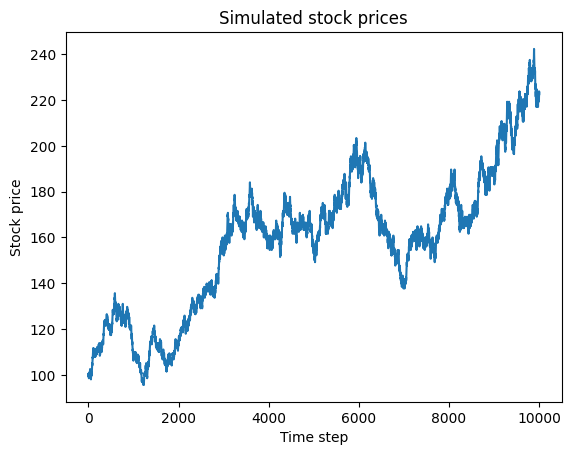

Call option price: 48.715114765588844


In [8]:
S0 = 100  # init price
K = 105  # strike price (for call option)
T = 1  # time to maturity
r = 0.1  # risk free rate
sigma = 0.5  # volantility
N = 10000

# Calculate the call option price using Monte Carlo simulation
call_option_price, simulated_stock_prices = calculate_call_option_price(S0, K, T, r, sigma, N)

plt.plot(simulated_stock_prices)
plt.xlabel("Time step")
plt.ylabel("Stock price")
plt.title("Simulated stock prices")
plt.show()

print("Call option price:", call_option_price)